# Decision Tree Classifier - Breast Cancer

In [95]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import time
import numpy as np

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


In [97]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 0: malignant (bad), 1: benign (Not bad)

df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [98]:
df.shape

(569, 31)

## Data Split

In [99]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 30)
Test: (114, 30)


## Hyperparameter Tunning

In [102]:
t0 = time.time()

parameters = {
    'n_estimators': [30, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [4, 5, 6, 7, 8],
    'max_features': ['sqrt', 'log2']
}
estimator = RandomForestClassifier(n_jobs=-1)

# Scoring methods
# https://scikit-learn.org/stable/modules/model_evaluation.html

clf = GridSearchCV(estimator = estimator,
                   param_grid = parameters,
                   cv=10,
                   scoring='f1',
                   n_jobs = -1,
                   verbose=True)
clf.fit(X,y)

t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Processing time: 26.61075


In [103]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [104]:
clf.best_score_

0.9765865009393266

## Training

In [79]:
model = RandomForestClassifier(**clf.best_params_,
                               n_jobs=-1)
model.fit(X_train, y_train)

cv_results = cross_validate(model, X, y, cv=10)

In [80]:
cv_results["test_score"]

array([0.98245614, 0.87719298, 0.92982456, 0.94736842, 0.98245614,
       0.98245614, 0.96491228, 0.98245614, 0.96491228, 1.        ])

In [81]:
np.average(cv_results["test_score"])

0.9614035087719298

## Evaluation

In [82]:
model.score(X_train, y_train)

0.9912087912087912

In [83]:
model.score(X_test, y_test)

0.9649122807017544

### Confusion Matrix

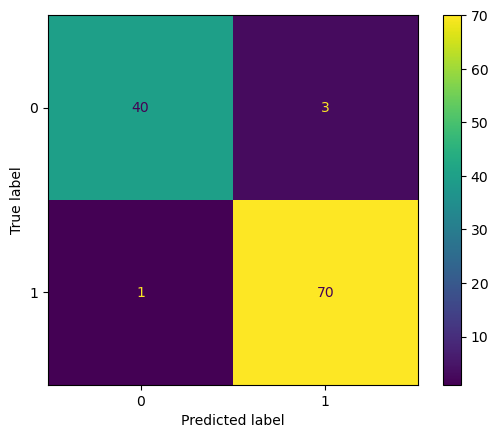

In [84]:
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Important Features

In [85]:
model.feature_importances_

array([0.07297176, 0.01367089, 0.04840874, 0.02888513, 0.00750288,
       0.01622223, 0.03813905, 0.06589874, 0.00316529, 0.00536278,
       0.00515822, 0.00131162, 0.01337276, 0.04680273, 0.00195824,
       0.00219457, 0.00627464, 0.01163389, 0.00882488, 0.00326253,
       0.05386789, 0.01351821, 0.11901565, 0.14626009, 0.02209112,
       0.02457495, 0.06318834, 0.13997033, 0.00635743, 0.01013441])

In [86]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)),
                           columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0.001312,texture error
1,0.001958,smoothness error
2,0.002195,compactness error
3,0.003165,mean symmetry
4,0.003263,fractal dimension error
5,0.005158,radius error
6,0.005363,mean fractal dimension
7,0.006275,concavity error
8,0.006357,worst symmetry
9,0.007503,mean smoothness


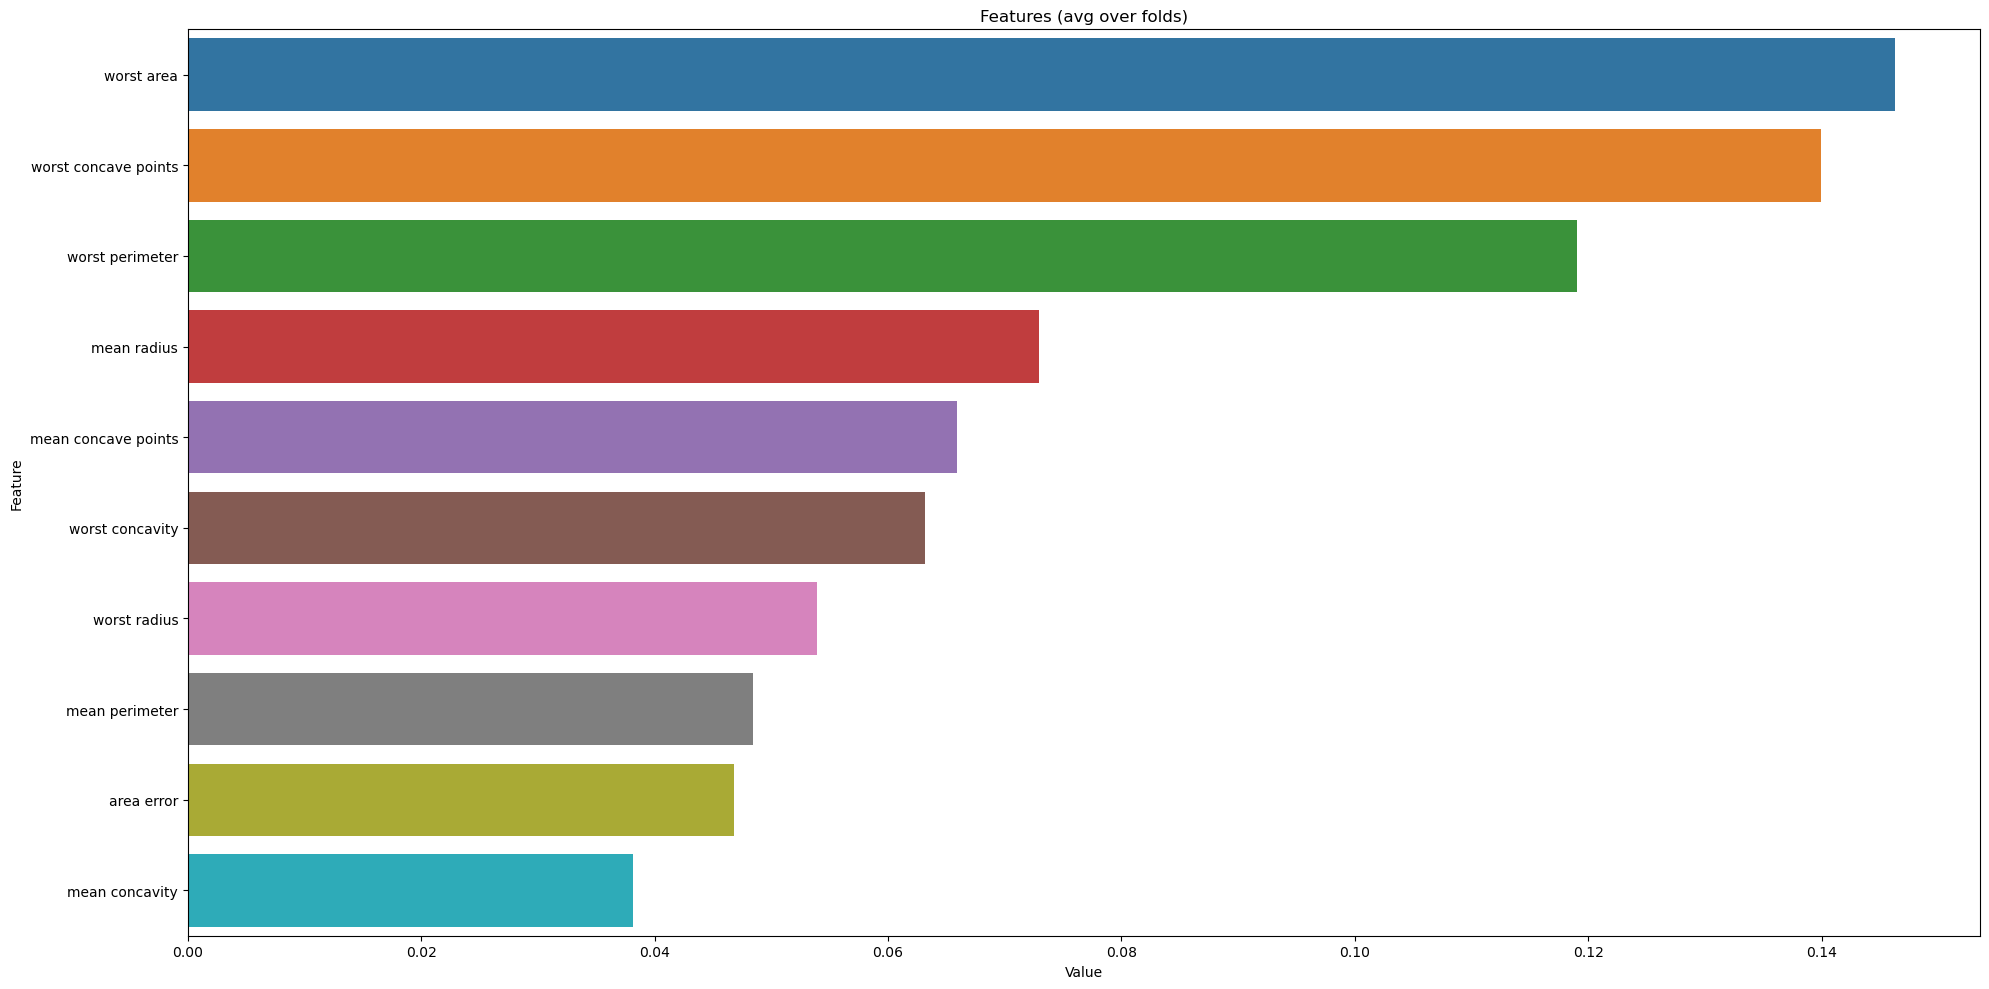

In [87]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(10))
plt.title('Features (avg over folds)')
plt.tight_layout()
plt.show()